# Advance Data Manipulation

- Group By: split-apply-combine
- Merge, join, and concatenate
- Reshaping and Pivot Tables

In [77]:
## We load the libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
## we load the data

titanic_df = sns.load_dataset("titanic")
titanic_df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Group By: split-apply-combine

In [61]:
## Group by columns
grouped = titanic_df.groupby(["survived", "sex"])


In [10]:
# We sum by groups
grouped.sum()


pclass       age  sibsp  parch        fare  adult_male  alone
survived sex                                                                  
0        female     231   1603.00     98     84   1864.9752           0     27
         male      1159  11382.50    206     97  10277.7447         449    347
1        female     447   5683.00    120    120  12101.6876           0     99
         male       220   2536.67     42     39   4449.5418          88     64

In [11]:
# Or we count by groups
grouped.count()


pclass  age  sibsp  parch  fare  embarked  class  who  \
survived sex                                                             
0        female      81   64     81     81    81        81     81   81   
         male       468  360    468    468   468       468    468  468   
1        female     233  197    233    233   233       231    233  233   
         male       109   93    109    109   109       109    109  109   

                 adult_male  deck  embark_town  alive  alone  
survived sex                                                  
0        female          81     6           81     81     81  
         male           468    61          468    468    468  
1        female         233    91          231    233    233  
         male           109    45          109    109    109

In [12]:
# or we look at the first row
grouped.first()


pclass   age  sibsp  parch     fare embarked   class    who  \
survived sex                                                                   
0        female       3  14.0      0      0   7.8542        S   Third  child   
         male         3  22.0      1      0   7.2500        S   Third    man   
1        female       1  38.0      1      0  71.2833        C   First  woman   
         male         2  34.0      0      0  13.0000        S  Second    man   

                 adult_male deck  embark_town alive  alone  
survived sex                                                
0        female       False    C  Southampton    no   True  
         male          True    E  Southampton    no  False  
1        female       False    C    Cherbourg   yes  False  
         male          True    D  Southampton   yes   True

In [13]:
# We can look at the index of the different groups
grouped.groups


{(0, 'female'): [14, 18, 24, 38, 40, 41, 49, 71, 100, 111, 113, 114, 119, 132, 140, 147, 167, 177, 180, 199, 205, 229, 235, 240, 246, 251, 254, 264, 276, 293, 297, 312, 357, 362, 374, 396, 402, 404, 409, 415, 419, 423, 436, 474, 485, 498, 501, 502, 503, 534, 541, 542, 564, 567, 578, 593, 610, 617, 634, 638, 642, 654, 657, 678, 680, 702, 729, 736, 767, 772, 792, 799, 807, 813, 816, 852, 854, 863, 882, 885, 888], (0, 'male'): [0, 4, 5, 6, 7, 12, 13, 16, 20, 26, 27, 29, 30, 33, 34, 35, 37, 42, 45, 46, 48, 50, 51, 54, 57, 59, 60, 62, 63, 64, 67, 69, 70, 72, 73, 75, 76, 77, 80, 83, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 99, 101, 102, 103, 104, 105, 108, 110, 112, 115, 116, 117, 118, 120, 121, 122, 124, 126, 129, 130, 131, 134, 135, 137, 138, 139, 143, 144, 145, 148, 149, 150, 152, 153, 154, 155, 157, 158, 159, 160, 162, 163, 164, 168, 169, 170, 171, 173, 174, 175, ...], (1, 'female'): [1, 2, 3, 8, 9, 10, 11, 15, 19, 22, 25, 28, 31, 32, 39, 43, 44, 47, 52, 53, 56, 58, 61, 66, 68, 79, 82, 84

In [14]:
## Lets create a MultiIndex
titanic_Indexed = titanic_df.set_index(["survived", "sex"])
titanic_Indexed


pclass   age  sibsp  parch     fare embarked   class    who  \
survived sex                                                                   
0        male         3  22.0      1      0   7.2500        S   Third    man   
1        female       1  38.0      1      0  71.2833        C   First  woman   
         female       3  26.0      0      0   7.9250        S   Third  woman   
         female       1  35.0      1      0  53.1000        S   First  woman   
0        male         3  35.0      0      0   8.0500        S   Third    man   
...                 ...   ...    ...    ...      ...      ...     ...    ...   
         male         2  27.0      0      0  13.0000        S  Second    man   
1        female       1  19.0      0      0  30.0000        S   First  woman   
0        female       3   NaN      1      2  23.4500        S   Third  woman   
1        male         1  26.0      0      0  30.0000        C   First    man   
0        male         3  32.0      0      0   7.7500        Q   Third    man   

                 adult_male deck  embark_town alive  alone  
survived sex                                                
0        male          True  NaN  Southampton    no  False  
1        female       False    C    Cherbourg   yes  False  
         female       False  NaN  Southampton   yes   True  
         female       False    C  Southampton   yes  False  
0        male          True  NaN  Southampton    no   True  
...                     ...  ...          ...   ...    ...  
         male          True  NaN  Southampton    no   True  
1        female       False    B  Southampton   yes   True  
0        female       False  NaN  Southampton    no  False  
1        male          True    C    Cherbourg   yes   True  
0        male          True  NaN   Queenstown    no   True  

[891 rows x 13 columns]

In [15]:
# MultiIndex
titanic_Indexed.sort_index(inplace=True)
titanic_Indexed.index


MultiIndex([(0, 'female'),
            (0, 'female'),
            (0, 'female'),
            (0, 'female'),
            (0, 'female'),
            (0, 'female'),
            (0, 'female'),
            (0, 'female'),
            (0, 'female'),
            (0, 'female'),
            ...
            (1,   'male'),
            (1,   'male'),
            (1,   'male'),
            (1,   'male'),
            (1,   'male'),
            (1,   'male'),
            (1,   'male'),
            (1,   'male'),
            (1,   'male'),
            (1,   'male')],
           names=['survived', 'sex'], length=891)

In [16]:
# We can index the rows using tuples
titanic_Indexed.loc[(0, "male")]


pclass   age  sibsp  parch     fare embarked   class    who  \
survived sex                                                                 
0        male       3  22.0      1      0   7.2500        S   Third    man   
         male       3  35.0      0      0   8.0500        S   Third    man   
         male       3   NaN      0      0   8.4583        Q   Third    man   
         male       1  54.0      0      0  51.8625        S   First    man   
         male       3   2.0      3      1  21.0750        S   Third  child   
...               ...   ...    ...    ...      ...      ...     ...    ...   
         male       3  33.0      0      0   7.8958        S   Third    man   
         male       2  28.0      0      0  10.5000        S  Second    man   
         male       3  25.0      0      0   7.0500        S   Third    man   
         male       2  27.0      0      0  13.0000        S  Second    man   
         male       3  32.0      0      0   7.7500        Q   Third    man   

               adult_male deck  embark_town alive  alone  
survived sex                                              
0        male        True  NaN  Southampton    no  False  
         male        True  NaN  Southampton    no   True  
         male        True  NaN   Queenstown    no   True  
         male        True    E  Southampton    no   True  
         male       False  NaN  Southampton    no  False  
...                   ...  ...          ...   ...    ...  
         male        True  NaN  Southampton    no   True  
         male        True  NaN  Southampton    no   True  
         male        True  NaN  Southampton    no   True  
         male        True  NaN  Southampton    no   True  
         male        True  NaN   Queenstown    no   True  

[468 rows x 13 columns]

In [17]:
# We can look at cross(x) sections(s)
titanic_Indexed.xs("male", level=1)


,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
survived,,,,,,,,,,,,,
0,3,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
0,3,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
0,3,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
0,1,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
0,3,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,3,32.0,0,0,56.4958,S,Third,man,True,NaN,Southampton,yes,True
1,1,NaN,0,0,29.7000,C,First,man,True,C,Cherbourg,yes,True
1,1,51.0,0,0,26.5500,S,First,man,True,E,Southampton,yes,True


In [18]:
# finally we can groupby levels
titanic_Indexed.groupby(level=[0, 1]).mean()


pclass        age     sibsp     parch       fare  \
survived sex                                                          
0        female  2.851852  25.046875  1.209877  1.037037  23.024385   
         male    2.476496  31.618056  0.440171  0.207265  21.960993   
1        female  1.918455  28.847716  0.515021  0.515021  51.938573   
         male    2.018349  27.276022  0.385321  0.357798  40.821484   

                 adult_male     alone  
survived sex                           
0        female    0.000000  0.333333  
         male      0.959402  0.741453  
1        female    0.000000  0.424893  
         male      0.807339  0.587156

In [19]:
# We can also iterate through the different groups
for name, group in grouped:
    print(name)
    print(group)


(0, 'female')
     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
14          0       3  female  14.0      0      0   7.8542        S   Third   
18          0       3  female  31.0      1      0  18.0000        S   Third   
24          0       3  female   8.0      3      1  21.0750        S   Third   
38          0       3  female  18.0      2      0  18.0000        S   Third   
40          0       3  female  40.0      1      0   9.4750        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
854         0       2  female  44.0      1      0  26.0000        S  Second   
863         0       3  female   NaN      8      2  69.5500        S   Third   
882         0       3  female  22.0      0      0  10.5167        S   Third   
885         0       3  female  39.0      0      5  29.1250        Q   Third   
888         0       3  female   NaN      1      2  23.4500        S   Third   

       who  adult_male deck  embark_t

In [20]:
import numpy as np

# we can use the function agg (or aggregate) to apply function to the groups
grouped.agg(np.sum)


pclass       age  sibsp  parch        fare  adult_male  alone
survived sex                                                                  
0        female     231   1603.00     98     84   1864.9752           0     27
         male      1159  11382.50    206     97  10277.7447         449    347
1        female     447   5683.00    120    120  12101.6876           0     99
         male       220   2536.67     42     39   4449.5418          88     64

In [21]:
## equivalent to
grouped.sum()


pclass       age  sibsp  parch        fare  adult_male  alone
survived sex                                                                  
0        female     231   1603.00     98     84   1864.9752           0     27
         male      1159  11382.50    206     97  10277.7447         449    347
1        female     447   5683.00    120    120  12101.6876           0     99
         male       220   2536.67     42     39   4449.5418          88     64

In [75]:
# selecting numeric_columns
numeric_columns = titanic_df.select_dtypes(include=[np.number]).columns

# But we can apply many function at once!
grouped[numeric_columns].agg([np.mean, np.std])

# or
# grouped.agg({col: [np.mean, np.std] for col in numeric_columns})

survived         pclass                  age             \
                    mean  std      mean       std       mean        std   
survived sex                                                              
0        female      0.0  0.0  2.851852  0.450309  25.046875  13.618591   
         male        0.0  0.0  2.476496  0.761411  31.618056  14.056019   
1        female      1.0  0.0  1.918455  0.834211  28.847716  14.175073   
         male        1.0  0.0  2.018349  0.922774  27.276022  16.504803   

                    sibsp               parch                 fare             
                     mean       std      mean       std       mean        std  
survived sex                                                                   
0        female  1.209877  1.814635  1.037037  1.391442  23.024385  24.821287  
         male    0.440171  1.138507  0.207265  0.601382  21.960993  32.409799  
1        female  0.515021  0.737533  0.515021  0.820527  51.938573  64.102256  
         male    0.385321  0.636952  0.357798  0.645826  40.821484  71.355967

In [72]:
# We can transform the different groups

# For example can renormized the data

normalize = lambda x: (x - x.mean()) / x.std()
grouped[numeric_columns].transform(normalize)


,survived,pclass,age,sibsp,parch,fare
0,NaN,0.687545,-0.684266,0.491722,-0.344648,-0.453906
1,NaN,-1.100986,0.645660,0.657569,-0.627671,0.301779
2,NaN,1.296489,-0.200896,-0.698303,-0.627671,-0.686615
3,NaN,-1.100986,0.434021,0.657569,-0.627671,0.018118
4,NaN,0.687545,0.240605,-0.386621,-0.344648,-0.429222
...,...,...,...,...,...,...
886,NaN,-0.625807,-0.328546,-0.386621,-0.344648,-0.276490
887,NaN,-1.100986,-0.694721,-0.698303,-0.627671,-0.342243
888,NaN,0.328993,NaN,-0.115658,0.692061,0.017147
889,NaN,-1.103573,-0.077312,-0.604945,-0.554016,-0.151655


In [74]:
# Or equivalently


def normalize(x):
    return (x - x.mean()) / x.std()


grouped[numeric_columns].transform(normalize)


,survived,pclass,age,sibsp,parch,fare
0,NaN,0.687545,-0.684266,0.491722,-0.344648,-0.453906
1,NaN,-1.100986,0.645660,0.657569,-0.627671,0.301779
2,NaN,1.296489,-0.200896,-0.698303,-0.627671,-0.686615
3,NaN,-1.100986,0.434021,0.657569,-0.627671,0.018118
4,NaN,0.687545,0.240605,-0.386621,-0.344648,-0.429222
...,...,...,...,...,...,...
886,NaN,-0.625807,-0.328546,-0.386621,-0.344648,-0.276490
887,NaN,-1.100986,-0.694721,-0.698303,-0.627671,-0.342243
888,NaN,0.328993,NaN,-0.115658,0.692061,0.017147
889,NaN,-1.103573,-0.077312,-0.604945,-0.554016,-0.151655


In [76]:
# The function apply can be used in a more general usecase

grouped[numeric_columns].apply(lambda x: x.mean())


survived    pclass        age     sibsp     parch       fare
survived sex                                                                 
0        female       0.0  2.851852  25.046875  1.209877  1.037037  23.024385
         male         0.0  2.476496  31.618056  0.440171  0.207265  21.960993
1        female       1.0  1.918455  28.847716  0.515021  0.515021  51.938573
         male         1.0  2.018349  27.276022  0.385321  0.357798  40.821484

survived  sex   
0         female    AxesSubplot(0.125,0.125;0.775x0.755)
          male      AxesSubplot(0.125,0.125;0.775x0.755)
1         female    AxesSubplot(0.125,0.125;0.775x0.755)
          male      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

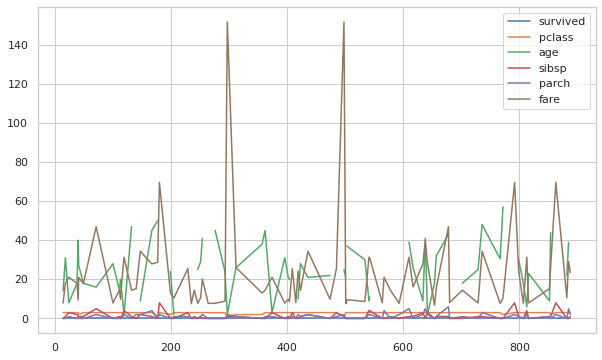

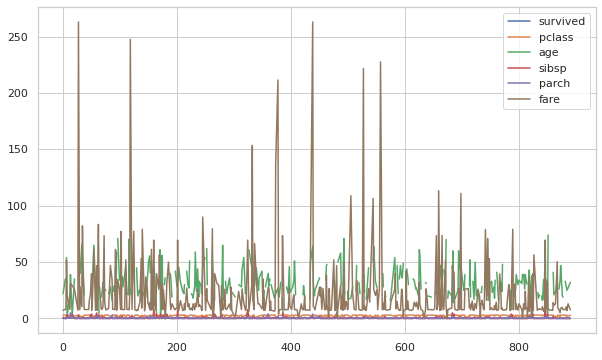

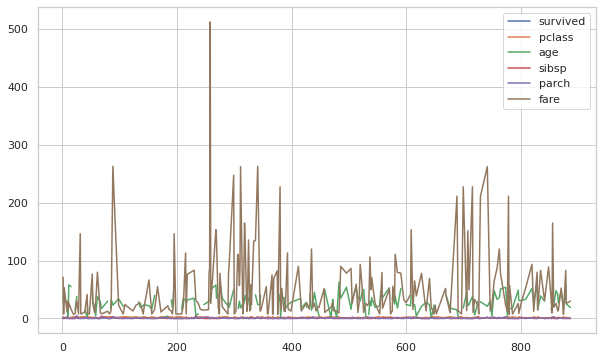

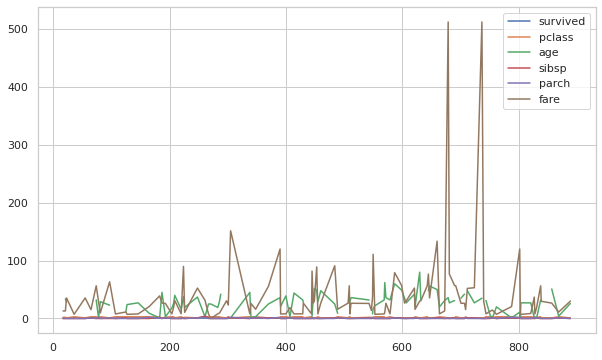

In [78]:
%matplotlib inline
# We can also plot

grouped.plot(figsize=(10,6))

## Merge, join, and concatenate

In [27]:
# Concatenate

# lets create a sample of the data
titanic_sample = titanic_df.sample(frac=0.1)
print(titanic_sample.shape, titanic_df.shape)


(89, 15) (891, 15)


In [28]:
titanic_sample


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
238,0,2,male,19.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
217,0,2,male,42.0,1,0,27.0000,S,Second,man,True,NaN,Southampton,no,False
458,1,2,female,50.0,0,0,10.5000,S,Second,woman,False,NaN,Southampton,yes,True
377,0,1,male,27.0,0,2,211.5000,C,First,man,True,C,Cherbourg,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
246,0,3,female,25.0,0,0,7.7750,S,Third,woman,False,NaN,Southampton,no,True
149,0,2,male,42.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
862,1,1,female,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True


In [29]:
# We concatenate
titanic_augmented = pd.concat([titanic_df, titanic_sample])
titanic_augmented.shape


(980, 15)

In [30]:
# it is very easy to also recopy the data multiple times
titanic_augmented = pd.concat([titanic_df] * 10)
titanic_augmented.shape


(8910, 15)

In [31]:
# We can also contenate the rows

additional_cols = pd.DataFrame(
    {
        "temperature": np.random.randint(0, 100, size=titanic_df.shape[0]),
        "time": pd.date_range("1/1/1811", periods=titanic_df.shape[0], freq="H"),
    }
).sample(frac=1)

additional_cols


,temperature,time
45,2,1811-01-02 21:00:00
877,67,1811-02-06 13:00:00
693,24,1811-01-29 21:00:00
444,34,1811-01-19 12:00:00
202,47,1811-01-09 10:00:00
...,...,...
648,81,1811-01-28 00:00:00
549,62,1811-01-23 21:00:00
672,8,1811-01-29 00:00:00
489,10,1811-01-21 09:00:00


In [81]:
pd.concat([titanic_df, additional_cols], axis=1)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,temperature,time
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,29,1811-01-01 00:00:00
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,58,1811-01-01 01:00:00
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,96,1811-01-01 02:00:00
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,60,1811-01-01 03:00:00
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,97,1811-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,66,1811-02-06 22:00:00
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,49,1811-02-06 23:00:00
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,48,1811-02-07 00:00:00
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,45,1811-02-07 01:00:00


In [33]:
## Merging
import numpy as np
import pandas as pd

df1 = pd.DataFrame({"A": range(10), "B": range(5, 15), "C": range(15, 25)})
df2 = pd.DataFrame(
    {
        "C": np.random.randint(0, 30, size=10),
        "D": np.random.randint(0, 30, size=10),
        "E": np.random.randint(0, 30, size=10),
    }
)


In [34]:
df1


,A,B,C
0,0,5,15
1,1,6,16
2,2,7,17
3,3,8,18
4,4,9,19
5,5,10,20
6,6,11,21
7,7,12,22
8,8,13,23
9,9,14,24


In [35]:
df2


,C,D,E
0,29,21,13
1,11,28,27
2,27,9,0
3,23,8,4
4,28,3,1
5,0,8,14
6,21,17,11
7,22,12,25
8,9,17,2
9,21,7,29


In [36]:
pd.merge(df1, df2, on="C", how="inner")


,A,B,C,D,E
0,6,11,21,17,11
1,6,11,21,7,29
2,7,12,22,12,25
3,8,13,23,8,4


In [37]:
df1.merge(df2, on="C", how="outer", indicator=True)


,A,B,C,D,E,_merge
0,0.0,5.0,15,NaN,NaN,left_only
1,1.0,6.0,16,NaN,NaN,left_only
2,2.0,7.0,17,NaN,NaN,left_only
3,3.0,8.0,18,NaN,NaN,left_only
4,4.0,9.0,19,NaN,NaN,left_only
5,5.0,10.0,20,NaN,NaN,left_only
6,6.0,11.0,21,17.0,11.0,both
7,6.0,11.0,21,7.0,29.0,both
8,7.0,12.0,22,12.0,25.0,both
9,8.0,13.0,23,8.0,4.0,both


In [38]:
# Join on index

df1 = pd.DataFrame(
    {"A": range(10), "B": range(5, 15), "C": range(15, 25)}, index=range(3, 13)
)
df2 = pd.DataFrame(
    {
        "F": np.random.randint(0, 30, size=10),
        "D": np.random.randint(0, 30, size=10),
        "E": np.random.randint(0, 30, size=10),
    },
    index=np.random.randint(0, 30, size=10),
)

df1.join(df2, how="inner")


,A,B,C,F,D,E
3,0,5,15,28,21,2
4,1,6,16,23,4,16


In [39]:
df2


,F,D,E
1,3,3,14
22,6,19,21
26,17,2,8
15,5,20,6
16,20,21,7
22,29,2,14
26,1,12,23
3,28,21,2
4,23,4,16
1,1,22,14


## Reshaping and Pivot Tables

In [40]:
titanic_df[["embark_town", "age"]]


,embark_town,age
0,Southampton,22.0
1,Cherbourg,38.0
2,Southampton,26.0
3,Southampton,35.0
4,Southampton,35.0
...,...,...
886,Southampton,27.0
887,Southampton,19.0
888,Southampton,NaN
889,Cherbourg,26.0


In [41]:
# pivoting
pivoted = titanic_df.pivot(columns="embark_town", values="age")
pivoted


embark_town,NaN,Cherbourg,Queenstown,Southampton
0,NaN,NaN,NaN,22.0
1,NaN,38.0,NaN,NaN
2,NaN,NaN,NaN,26.0
3,NaN,NaN,NaN,35.0
4,NaN,NaN,NaN,35.0
...,...,...,...,...
886,NaN,NaN,NaN,27.0
887,NaN,NaN,NaN,19.0
888,NaN,NaN,NaN,NaN
889,NaN,26.0,NaN,NaN


In [42]:
# stacking

stacked = titanic_df.stack()
stacked


0    survived                0
     pclass                  3
     sex                  male
     age                  22.0
     sibsp                   1
                       ...    
890  who                   man
     adult_male           True
     embark_town    Queenstown
     alive                  no
     alone                True
Length: 12496, dtype: object

In [43]:
stacked.unstack()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0,C,First,man,True,C,Cherbourg,yes,True


In [44]:
# Pivot table
from itertools import product

df_xyz = pd.DataFrame(list(product(range(10), range(10))), columns=["X", "Y"])
df_xyz["Values"] = np.random.random(size=df_xyz.shape[0])
df_xyz


,X,Y,Values
0,0,0,0.940067
1,0,1,0.162895
2,0,2,0.859323
3,0,3,0.755514
4,0,4,0.701519
...,...,...,...
95,9,5,0.506654
96,9,6,0.852071
97,9,7,0.481439
98,9,8,0.098115


In [45]:
pivoted = df_xyz.pivot_table(index="X", columns="Y", values="Values")
pivoted


Y,0,1,2,3,4,5,6,7,8,9
X,,,,,,,,,,
0,0.940067,0.162895,0.859323,0.755514,0.701519,0.419648,0.398716,0.008847,0.644439,0.788209
1,0.440819,0.626185,0.568078,0.689924,0.386668,0.775362,0.670658,0.417358,0.471741,0.053945
2,0.936994,0.500709,0.143394,0.703911,0.334211,0.132410,0.622007,0.873247,0.716517,0.157029
3,0.852073,0.308919,0.135004,0.318028,0.693922,0.306695,0.166620,0.825177,0.746838,0.229171
4,0.333006,0.702236,0.728475,0.780247,0.534378,0.718146,0.059584,0.754184,0.146080,0.391495
5,0.915580,0.103717,0.168608,0.792202,0.099492,0.950555,0.637717,0.910261,0.193419,0.152419
6,0.432577,0.854169,0.460790,0.268189,0.204357,0.593739,0.358726,0.863730,0.659989,0.110431
7,0.017462,0.576205,0.359160,0.017187,0.656016,0.133513,0.470337,0.367058,0.981034,0.756463
8,0.173539,0.697156,0.961741,0.020162,0.290804,0.173740,0.839954,0.102845,0.234891,0.842571


In [46]:
df_xyz.pivot(index="X", columns="Y", values="Values")


Y,0,1,2,3,4,5,6,7,8,9
X,,,,,,,,,,
0,0.940067,0.162895,0.859323,0.755514,0.701519,0.419648,0.398716,0.008847,0.644439,0.788209
1,0.440819,0.626185,0.568078,0.689924,0.386668,0.775362,0.670658,0.417358,0.471741,0.053945
2,0.936994,0.500709,0.143394,0.703911,0.334211,0.132410,0.622007,0.873247,0.716517,0.157029
3,0.852073,0.308919,0.135004,0.318028,0.693922,0.306695,0.166620,0.825177,0.746838,0.229171
4,0.333006,0.702236,0.728475,0.780247,0.534378,0.718146,0.059584,0.754184,0.146080,0.391495
5,0.915580,0.103717,0.168608,0.792202,0.099492,0.950555,0.637717,0.910261,0.193419,0.152419
6,0.432577,0.854169,0.460790,0.268189,0.204357,0.593739,0.358726,0.863730,0.659989,0.110431
7,0.017462,0.576205,0.359160,0.017187,0.656016,0.133513,0.470337,0.367058,0.981034,0.756463
8,0.173539,0.697156,0.961741,0.020162,0.290804,0.173740,0.839954,0.102845,0.234891,0.842571


In [47]:
# melt

pivoted.reset_index().melt(id_vars="X")


,X,Y,value
0,0,0,0.940067
1,1,0,0.440819
2,2,0,0.936994
3,3,0,0.852073
4,4,0,0.333006
...,...,...,...
95,5,9,0.152419
96,6,9,0.110431
97,7,9,0.756463
98,8,9,0.842571


In [85]:
# This will produce an error
titanic_df.pivot(index="class", columns="embark_town", values="age")


ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
titanic_df.pivot_table(index="class", columns="embark_town", values="age")


embark_town,Cherbourg,Queenstown,Southampton
class,,,
First,38.027027,38.5000,38.152037
Second,22.766667,43.5000,30.386731
Third,20.741951,25.9375,25.696552


In [ ]:
# We can do the same thing with crosstab

pd.crosstab(
    titanic_df["class"],
    titanic_df["embark_town"],
    values=titanic_df["age"],
    aggfunc="mean",
    margins=True,
)


embark_town,Cherbourg,Queenstown,Southampton,All
class,,,,
First,38.027027,38.500000,38.152037,38.105543
Second,22.766667,43.500000,30.386731,29.877630
Third,20.741951,25.937500,25.696552,25.140620
All,30.814769,28.089286,29.445397,29.642093


In [ ]:
# Pivot_table can be use in a very similar manner than groupby

titanic_df.pivot_table(
    index=["survived", "class"], columns="embark_town", aggfunc="mean"
)


adult_male                               age             \
embark_town      Cherbourg Queenstown Southampton  Cherbourg Queenstown   
survived class                                                            
0        First    0.961538   1.000000    0.962264  43.380952  44.000000   
         Second   1.000000   1.000000    0.931818  29.500000  57.000000   
         Third    0.756098   0.711111    0.762238  26.065217  28.083333   
1        First    0.288136   0.000000    0.337838  35.905660  33.000000   
         Second   0.111111   0.000000    0.092105  16.875000  30.000000   
         Third    0.320000   0.111111    0.402985  13.940000  19.500000   

                                alone                               fare  \
embark_town     Southampton Cherbourg Queenstown Southampton   Cherbourg   
survived class                                                             
0        First    43.845238  0.615385   0.000000    0.660377   78.841981   
         Second   33.603659  0.375000   1.000000    0.727273   25.418225   
         Third    26.484716  0.707317   0.733333    0.674825    9.878361   
1        First    34.529091  0.423729   0.000000    0.418919  116.121754   
         Second   26.822027  0.333333   1.000000    0.407895   25.305100   
         Third    22.737705  0.360000   0.777778    0.582090   13.404668   

                    ...                     parch                         \
embark_town         ...     Southampton Cherbourg Queenstown Southampton   
survived class      ...                                                    
0        First      ...       57.260926  0.346154   0.000000    0.283019   
         Second     ...       18.946591  0.375000   0.000000    0.125000   
         Third      ...       14.529906  0.170732   0.288889    0.430070   
1        First      ...       79.750114  0.305085   0.000000    0.472973   
         Second     ...       21.926316  0.666667   0.000000    0.657895   
         Third      ...       15.131464  0.720000   0.000000    0.477612   

                   pclass                            sibsp             \
embark_town     Cherbourg Queenstown Southampton Cherbourg Queenstown   
survived class                                                          
0        First        1.0        1.0         1.0  0.153846   2.000000   
         Second       2.0        2.0         2.0  0.625000   0.000000   
         Third        3.0        3.0         3.0  0.243902   0.488889   
1        First        1.0        1.0         1.0  0.474576   1.000000   
         Second       2.0        2.0         2.0  0.555556   0.000000   
         Third        3.0        3.0         3.0  0.520000   0.296296   

                             
embark_town     Southampton  
survived class               
0        First     0.320755  
         Second    0.295455  
         Third     0.762238  
1        First     0.513514  
         Second    0.500000  
         Third     0.462687  

[6 rows x 21 columns]

In [ ]:
titanic_df.groupby(["survived", "class", "embark_town"]).mean()


pclass        age     sibsp     parch  \
survived class  embark_town                                          
0        First  Cherbourg       1.0  43.380952  0.153846  0.346154   
                Queenstown      1.0  44.000000  2.000000  0.000000   
                Southampton     1.0  43.845238  0.320755  0.283019   
         Second Cherbourg       2.0  29.500000  0.625000  0.375000   
                Queenstown      2.0  57.000000  0.000000  0.000000   
                Southampton     2.0  33.603659  0.295455  0.125000   
         Third  Cherbourg       3.0  26.065217  0.243902  0.170732   
                Queenstown      3.0  28.083333  0.488889  0.288889   
                Southampton     3.0  26.484716  0.762238  0.430070   
1        First  Cherbourg       1.0  35.905660  0.474576  0.305085   
                Queenstown      1.0  33.000000  1.000000  0.000000   
                Southampton     1.0  34.529091  0.513514  0.472973   
         Second Cherbourg       2.0  16.875000  0.555556  0.666667   
                Queenstown      2.0  30.000000  0.000000  0.000000   
                Southampton     2.0  26.822027  0.500000  0.657895   
         Third  Cherbourg       3.0  13.940000  0.520000  0.720000   
                Queenstown      3.0  19.500000  0.296296  0.000000   
                Southampton     3.0  22.737705  0.462687  0.477612   

                                   fare  adult_male     alone  
survived class  embark_town                                    
0        First  Cherbourg     78.841981    0.961538  0.615385  
                Queenstown    90.000000    1.000000  0.000000  
                Southampton   57.260926    0.962264  0.660377  
         Second Cherbourg     25.418225    1.000000  0.375000  
                Queenstown    12.350000    1.000000  1.000000  
                Southampton   18.946591    0.931818  0.727273  
         Third  Cherbourg      9.878361    0.756098  0.707317  
                Queenstown    11.654167    0.711111  0.733333  
                Southampton   14.529906    0.762238  0.674825  
1        First  Cherbourg    116.121754    0.288136  0.423729  
                Queenstown    90.000000    0.000000  0.000000  
                Southampton   79.750114    0.337838  0.418919  
         Second Cherbourg     25.305100    0.111111  0.333333  
                Queenstown    12.350000    0.000000  1.000000  
                Southampton   21.926316    0.092105  0.407895  
         Third  Cherbourg     13.404668    0.320000  0.360000  
                Queenstown    10.398770    0.111111  0.777778  
                Southampton   15.131464    0.402985  0.582090

## Questions: What category we better be in?

In [ ]:
titanic_df.dtypes


survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [86]:
some_columns = (
    titanic_df.drop(columns=["alive"]).select_dtypes(include=[object, "category"]).columns
)

titanic_df.groupby(list(set(some_columns) - set("survived")))[
    "survived"
].mean().sort_values(ascending=False)


class   deck  embarked  who    sex     embark_town
First   E     C         man    male    Cherbourg      1.0
        C     Q         woman  female  Queenstown     1.0
Second  D     C         woman  female  Cherbourg      1.0
        E     Q         woman  female  Queenstown     1.0
First   E     S         woman  female  Southampton    1.0
                                                     ... 
Third   G     S         woman  female  Cherbourg      NaN
                                       Queenstown     NaN
                               male    Cherbourg      NaN
                                       Queenstown     NaN
                                       Southampton    NaN
Name: survived, Length: 1134, dtype: float64